# Improving the Network Architecture of Assignment 4_C for an increased accuracy

## **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras #Update Keras
import keras #Import the Keras

Using TensorFlow backend.


In [0]:
import numpy as np #Import numpy and provide alias as np

from keras.models import Sequential #Import sequential from keras models to create sequential model
from keras.layers import Dense, Dropout, Activation, Flatten, Add #import dense, activation, flatten and add from keras layer
from keras.layers import Convolution2D, MaxPooling2D #import Convolution2D and Maxpooling2D from keras layers
from keras.utils import np_utils #Import np_utils from keras to convert array to binary one hot vector

from keras.datasets import mnist #Import mnist data

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


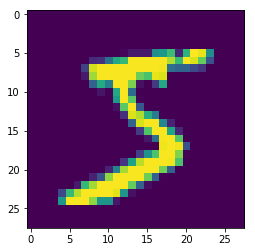

In [4]:
print (X_train.shape) #Print shape of the train dataframe
from matplotlib import pyplot as plt #Import pyplot as plt from matplotlib
%matplotlib inline 
plt.imshow(X_train[0]) #Show/Print the image

## Train Test reshaping data

In [0]:
X_train = X_train.reshape(X_train.shape[0],28,28,1) #Shape of train dataframe with 1st Dimension(Depth) and 28*28 Matrix with 1 feature
X_test = X_test.reshape(X_test.shape[0],28,28,1)#Shape of test dataframe with 1st Dimension(Depth) and 28*28 Matrix with 1 feature

##Data Normalization

In [0]:
X_train = X_train.astype('float32') #Change the data type to float
X_test = X_test.astype('float32') #Change the data type to float
X_train /= 255  # Normalise the data values to a range of [0,1]
X_test /= 255 # Normalise the data values to a range of [0,1]

In [7]:
y_train[:10] #First 10 elements of one dimensional y_train array

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10] #First 10 elements of 10 dimensional class array of Y_train


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Vanilla Model Architecture

In [14]:
from keras.layers import Activation, BatchNormalization
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Dropout(0.15))



model.add(Convolution2D(16, 1, 1, activation='relu')) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) # 12


model.add(Convolution2D(16, 3, 3, activation='relu')) # 10
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(16, 3, 3, activation='relu')) # 8
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(10, 3, 3, activation='relu')) # 6
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(10, 3, 3, activation='relu')) # 4
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(10, 4, 4)) #1
model.add(BatchNormalization())
model.add(Dropout(0.15))


model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: U

###Model Summary

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_15 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_16 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 16)        272       
__________

###Compile the model

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.004 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.004),
             metrics=['accuracy']) 

###Training the Model

In [26]:
model.fit(X_train, Y_train, batch_size=68, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.004.
60000/60000 [==============================] - 16s 264us/step - loss: 0.1840 - acc: 0.9142 - val_loss: 0.0582 - val_acc: 0.9844
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0030326005.
60000/60000 [==============================] - 13s 215us/step - loss: 0.1805 - acc: 0.9149 - val_loss: 0.0350 - val_acc: 0.9899
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0024420024.
60000/60000 [==============================] - 13s 212us/step - loss: 0.1730 - acc: 0.9167 - val_loss: 0.0279 - val_acc: 0.9932
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0020439448.
60000/60000 [==============================] - 13s 213us/step - loss: 0.1739 - acc: 0.9160 - val_loss: 0.0268 - val_acc: 0.9928
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0017574692.
60000/60000 [==

###Score the Model

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

###Print Score Accuracy

In [28]:
print(score)

[0.02045877612977929, 0.9947]


###Conclusion

###The Improvement on 3rd network has been performed by using the 
###MaxPooling, 
###1X1 Convolution, 
###Batch Normalisation, 
###Dropout, 
###Learning Rate
###reducing the number of Parameters to 11738 from 19K

###98.31% to 99.47%